## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*I would take Descriptive approach as we yet do not know what information is useful and has high impact on our wine quality.We are only given raw data, and using a descriptive technique can help us grasp the potential links between variables as well as present the data in a more comprehensible manner. After our analysis is finished, we would do the modellings.*

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*We need data with a lot of elements, such as physiochemical qualities (acidity, pH level, sugar, etc.) so that we may play around with them and figure out which ones are the best quality red wine indicators.*

### Data Collection

**Q3. From where do we get our data?**

*We get our data from Wine Quality Dataset which is gathered by:*
- *Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez*
- *A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009*

*and is accessible on UCI ML repository via this link https://archive.ics.uci.edu/ml/datasets/wine+quality*

The file winequality-red.csv contains records of wine attributes and their rankings. The data is mostly quantitative. The type of data we require is integer and ratio, also ordinal since we need the quality to know how much of an attribute will provide the best quality. 

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

The red wine samples are the variants of the Portuguese "Vinho Verde" wine, it is obtained from the north of Portugal.

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*Knowing the impact of each variable would help businesses(producers, distributors, etc) better assess their production, distribution, and pricing strategy.*

In [1]:
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import normalize, StandardScaler
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV

redwine = pd.read_csv('winequality-red.csv')
features = redwine.drop("quality", axis=1)
labels = redwine["quality"]
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**_Shape of the Data_**

In [2]:
print('Number of samples: ', redwine.shape[0])
print('Number of features: ', redwine.shape[1])

Number of samples:  1599
Number of features:  12


**_Datatypes of the features_**

In [3]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**_Understanding the Data_**

In [4]:
print(list(redwine.columns))
redwine['quality'].value_counts()

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

From the above table, we can see that the data in our dataset is not distributed well and we have a lot more medium quality wines than the very high or low quality wines.

<Figure size 432x288 with 0 Axes>

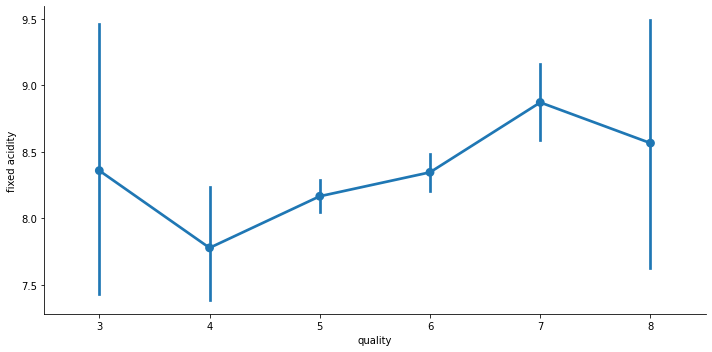

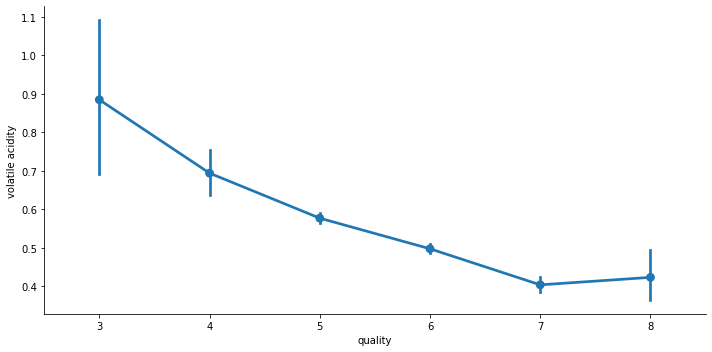

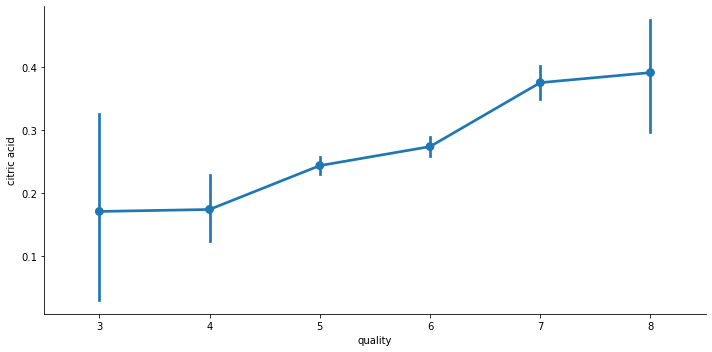

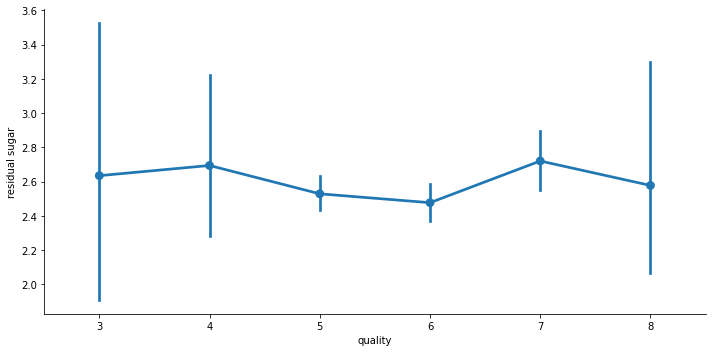

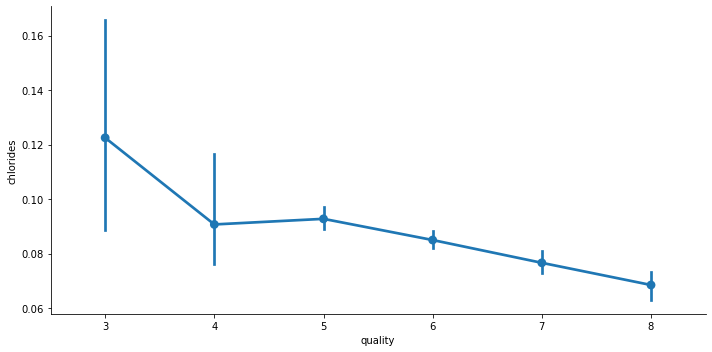

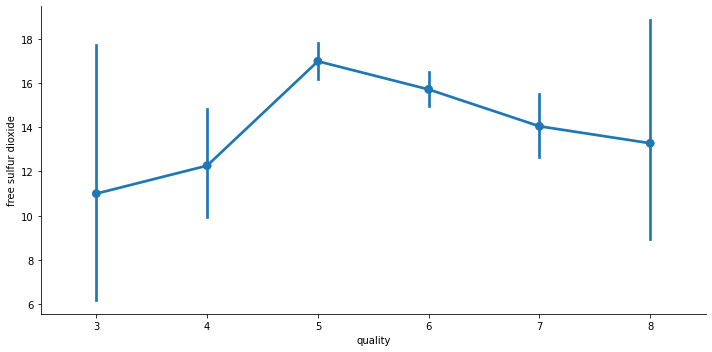

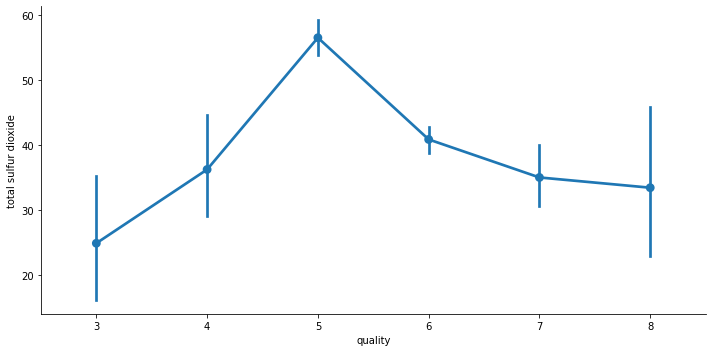

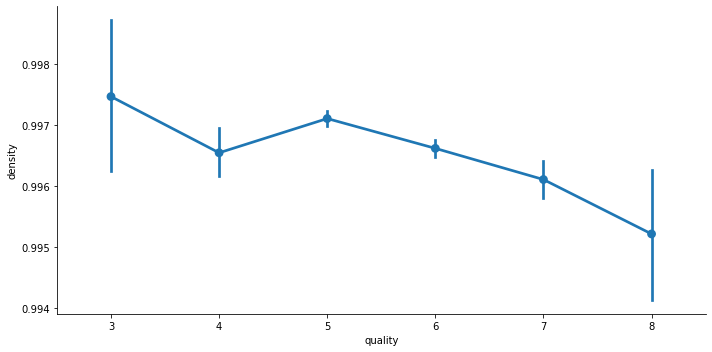

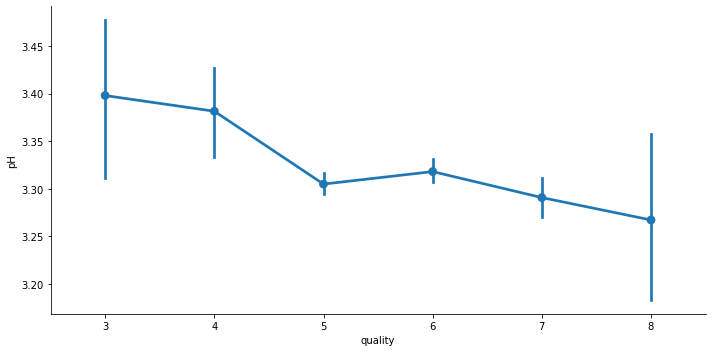

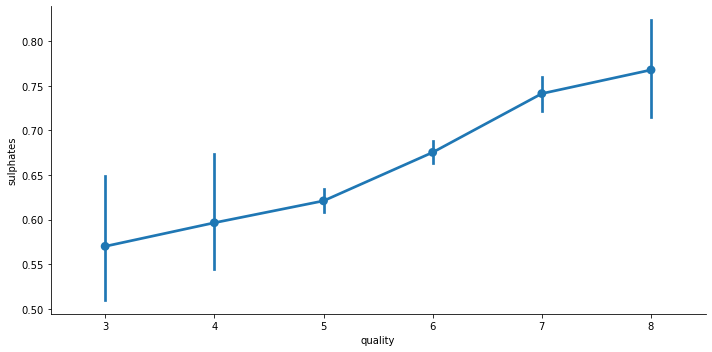

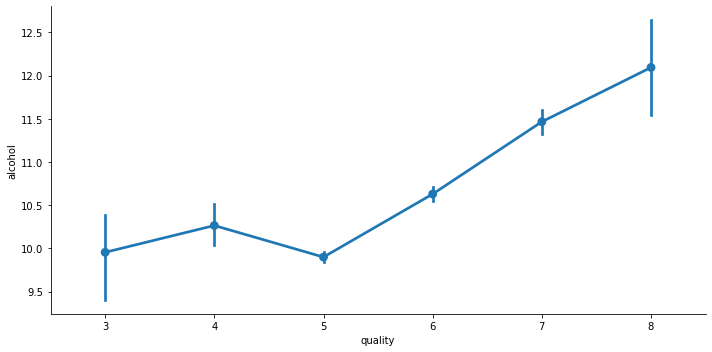

In [5]:
for i, col in enumerate(list(redwine.drop('quality', axis=1).columns)):
    plt.figure(i)
    sns.catplot(x='quality', y=col, data=redwine, kind='point', aspect=2, )

#### Observations
1. when there is low volatile acidity, chlorides, density, and pH, the quality of the wine is higher
2. when there is increase in citric acid, sulphates, and alcohol the quality becomes higher.
3. The residual sugar does not have much of a impact, across different wine qualities, the residual sugar remains the same.

The rest of the features have a mixture of behaviours regarding their impact on the quality.

### Data Preparation

#### Explore the dataset further
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

### Check for missing values and handle if any

In [6]:
redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Here, we can see our data has no missing values.**

 ### Check for outliers if any and handle them

<AxesSubplot:>

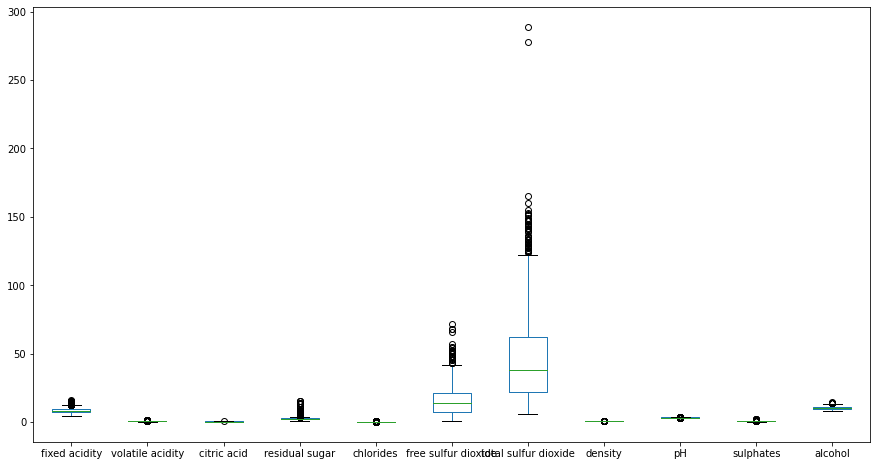

In [7]:
fig = plt.figure(figsize = (15,8))
redwine.drop(['quality'], axis=1).boxplot(grid=False)

There are obviously some outliers in our dataset which need to be handled. 
Also, from this graph we can see that the features are not on the same scale so we have class imbalance which can be solved using feature scaling.

In [8]:
df = redwine.copy()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# This part of the code is taken from StackOverflow
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Number of outliers detected %d" % (len(redwine) - len(df)))
print("Proportion of outliers to the whole dataset is %f" % ((len(redwine) - len(df))/len(redwine)))

Number of outliers detected 420
Proportion of outliers to the whole dataset is 0.262664


As the number of outliers detected in total are more than 25% of our dataset, then not dropping them would be more reasonable. We will try to cap and floor the outliers by the 10th and 90th percentile.

In [9]:
df = redwine.copy()

tenth_percentile = df.quantile(0.1)
ninetieth_percentile = df.quantile(0.9)

df = df.drop(['quality'], axis=1).clip(tenth_percentile, ninetieth_percentile, axis = 1)

# savng the dataframe for future use
df = df.assign(quality = redwine['quality'])
redwineMod = df

redwineMod.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.010,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.745,0.010,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.745,0.040,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,10.7,0.310,0.522,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.010,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Implement Correlation Heatmap

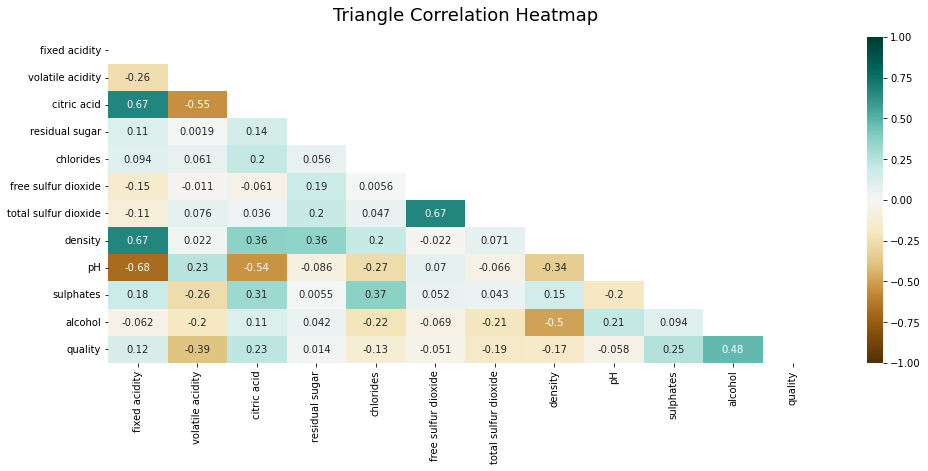

In [10]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(redwine.corr(), dtype=np.bool))
heatmap = sns.heatmap(redwine.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

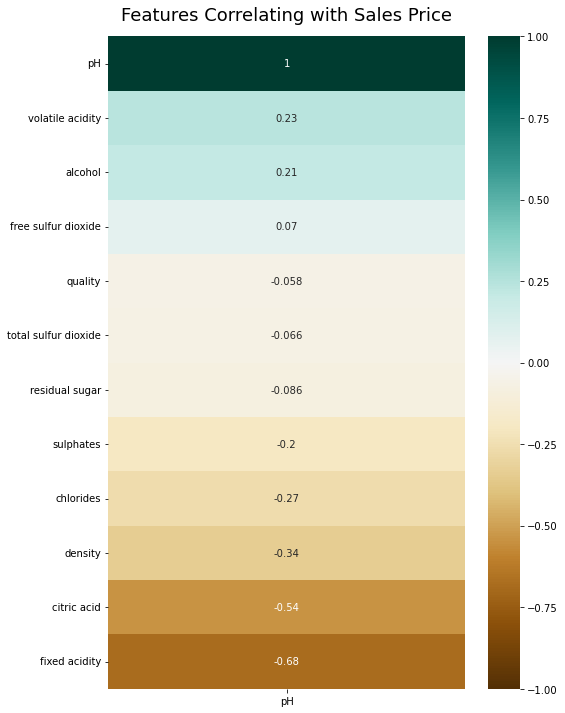

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(redwine.corr()[['pH']].sort_values(by='pH', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

#### Observations

No feature that is highly correlated (correlation > 0.5) with the `quality` of the wines.

### Check the distribution of data using histograms

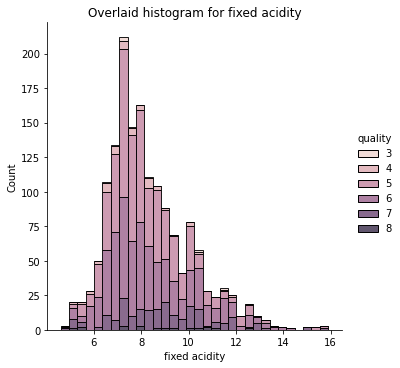

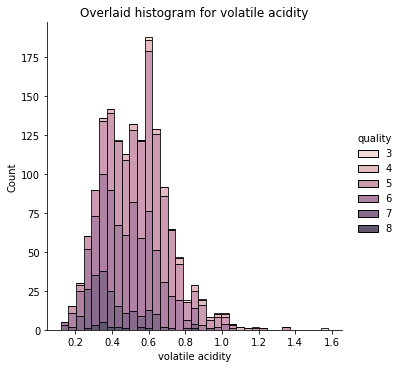

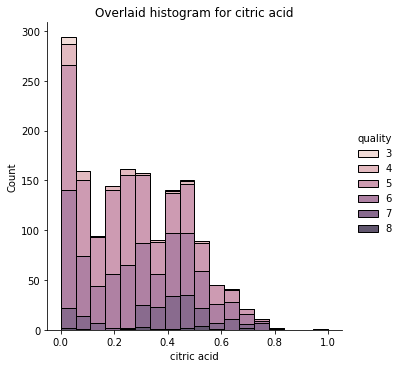

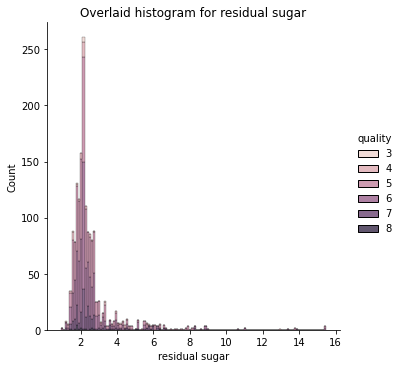

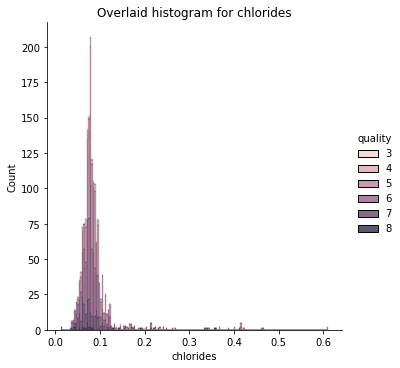

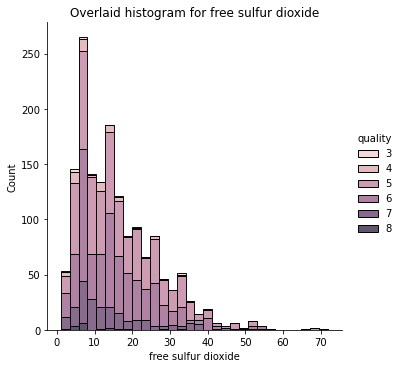

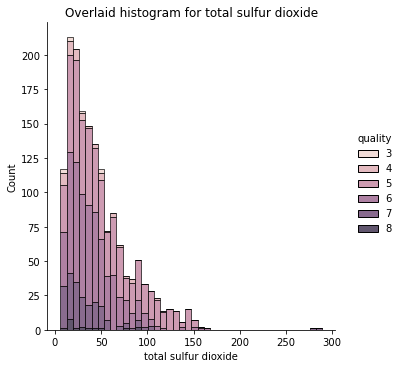

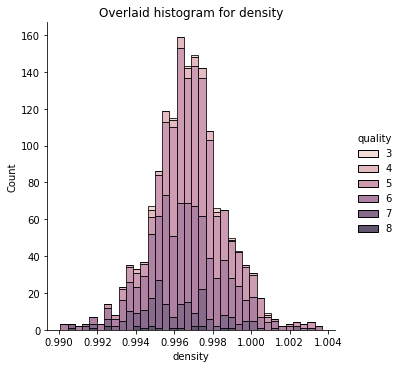

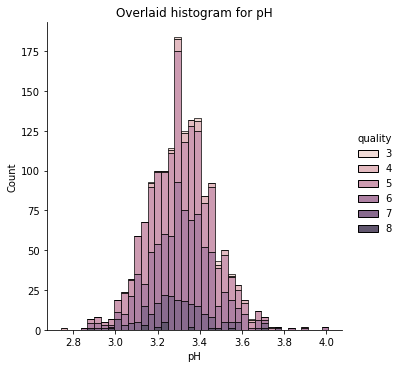

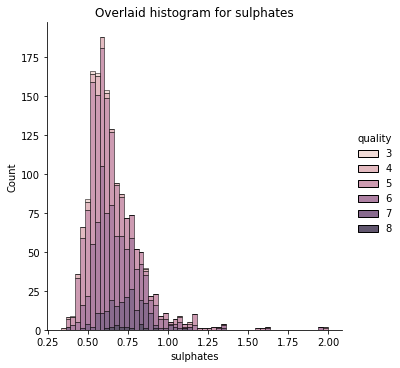

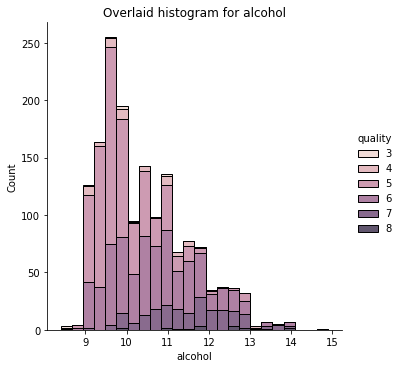

In [12]:
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
    xmin = min(features[i])
    xmax = max(features[i] + 1)
    width = (xmax-xmin)/40
    sns.displot(data=redwine, x=features[i], hue="quality", multiple="stack")
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

#### Observations
This distribution in histograms will help us have a basic understanding of effects of different features on the quality of the wine.

As we have mentioned earlier, the features are not on the same scale and we have class imbalance in our dataset. To fix this issue, we implement feature scaling by standard scalar.

In [13]:
# Prepare the data for modeling by carrying out any steps that you think are necessary
features = redwineMod.drop('quality', axis=1)
labels = redwineMod['quality']

# Creating Test and Train data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# implementing feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modeling

<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

*_Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice_*

In [14]:
# First Multivariable Linear Regression (Random Forest)
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=500)
rfModel.fit(X_train,y_train)
rfPreds = rfModel.predict(X_test)

# Second Multivariable Linear Regression Model (Gradient Boosting)
# We used GridSearchCV to find the best hyperparameters but as the output was large, we just used the hyperparameters we got from our GridSearch
from sklearn.ensemble import GradientBoostingRegressor
gbModel = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=250)
gbModel.fit(X_train,y_train)
gbPreds = gbModel.predict(X_test)

*_Implement a Neural Network using Tensorflow and Keras to classify wine quality_*

In [15]:
import tensorflow as tf
tf.version.VERSION
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

n_classes = 10
y_train_nn = to_categorical(y_train, n_classes)
y_test_nn = to_categorical(y_test, n_classes)

nnModel = Sequential()
nnModel.add(Dense(5, activation='relu', input_shape=(11,)))
nnModel.add(Dense(10, activation='softmax'))

In [16]:
nnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 60        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Neural Network Model Configuration
nnModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Neural Network Model Training
history = nnModel.fit(X_train, y_train_nn, batch_size=128, epochs=200, verbose=1, validation_data=(X_test, y_test_nn))

Epoch 1/200
10/10 [==============================] - 1s 30ms/step - loss: 2.4728 - accuracy: 0.1634 - val_loss: 2.4017 - val_accuracy: 0.2031
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 2.4204 - accuracy: 0.1861 - val_loss: 2.3545 - val_accuracy: 0.2438
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 2.3707 - accuracy: 0.2072 - val_loss: 2.3102 - val_accuracy: 0.2656
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 2.3246 - accuracy: 0.2228 - val_loss: 2.2677 - val_accuracy: 0.2781
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 2.2803 - accuracy: 0.2377 - val_loss: 2.2275 - val_accuracy: 0.2875
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 2.2389 - accuracy: 0.2541 - val_loss: 2.1893 - val_accuracy: 0.3031
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 2.1993 - accuracy: 0.2721 - val_loss: 2.1527 - val_accuracy: 0.3219
Epoch 8/200


### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

#### Regression Models

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

def r2(y_, y):
    return r2_score(y_, y)
def rmse(y_, y):
    return sqrt(mean_squared_error(y_, y))
def mae(y_, y):
    return mean_absolute_error(y_, y)

print('Random Forest scores: R^2: {}, RMSE: {}, MAE: {}'.format(r2(y_test, rfPreds), rmse(y_test, rfPreds), mae(y_test, rfPreds)))
print('Gradient Boosting scores: R^2: {}, RMSE: {}, MAE: {}'.format(r2(y_test, gbPreds), rmse(y_test, gbPreds), mae(y_test, gbPreds)))

Random Forest scores: R^2: 0.518585552085357, RMSE: 0.5608985313762196, MAE: 0.42851874999999995
Gradient Boosting scores: R^2: 0.48917187053888134, RMSE: 0.5777795217350751, MAE: 0.4523822849851932


As seen above, the Random Forest model outperforms the Gradient Boosting model in all of the R2, RMSE, and MAE metrics. The R2 of the Random Forest model is 0.52, whereas the R2 of the Gradient Boosting model is 0.49. (the higher, the better). The RMSE and MAE of the Random Forest model are 0.56 and 0.42, respectively, whereas the RMSE and MAE of the Gradient Boosting model are 0.58 and 0.45, respectively (the lower, the better).

In [19]:
# Calculating feature importance
from matplotlib import pyplot

rfImportance = rfModel.feature_importances_
gbImportance = gbModel.feature_importances_

featuresNames = list(redwineMod.columns)
# summarize feature importance
print("Random Forest Regression Feature Importance: ")
for i,v in enumerate(rfImportance):
    print('Feature: %20s, Score: %.5f' % (featuresNames[i],v))

print("\n\nGradient Boosting Regression Feature Importance: ")
for i,v in enumerate(gbImportance):
    print('Feature: %20s, Score: %.5f' % (featuresNames[i],v))

Random Forest Regression Feature Importance: 
Feature:        fixed acidity, Score: 0.05650
Feature:     volatile acidity, Score: 0.09530
Feature:          citric acid, Score: 0.05277
Feature:       residual sugar, Score: 0.04793
Feature:            chlorides, Score: 0.06856
Feature:  free sulfur dioxide, Score: 0.05091
Feature: total sulfur dioxide, Score: 0.08357
Feature:              density, Score: 0.05623
Feature:                   pH, Score: 0.05943
Feature:            sulphates, Score: 0.15816
Feature:              alcohol, Score: 0.27065


Gradient Boosting Regression Feature Importance: 
Feature:        fixed acidity, Score: 0.06324
Feature:     volatile acidity, Score: 0.10420
Feature:          citric acid, Score: 0.04193
Feature:       residual sugar, Score: 0.02628
Feature:            chlorides, Score: 0.06052
Feature:  free sulfur dioxide, Score: 0.03233
Feature: total sulfur dioxide, Score: 0.08289
Feature:              density, Score: 0.05641
Feature:                   p



Random Forest Regression Feature Importance Plot: 


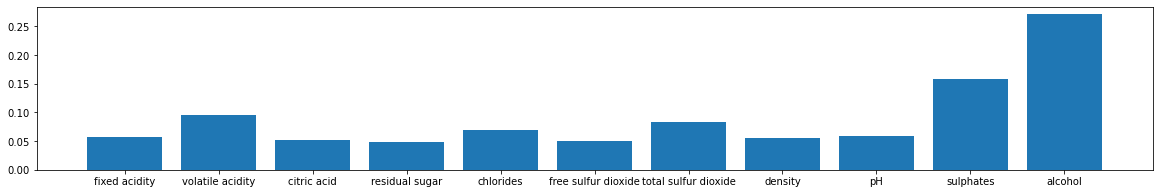



Gradient Boosting Regression Feature Importance Plot: 


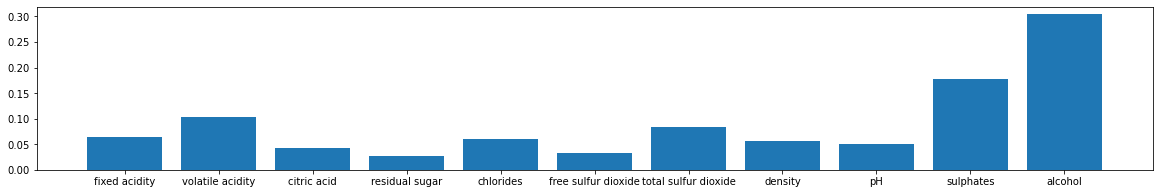

In [20]:
# plot feature importance
print("\n\nRandom Forest Regression Feature Importance Plot: ")
pyplot.figure(figsize=(20, 3))
pyplot.bar(featuresNames[:-1], list(rfImportance))
pyplot.show()

print("\n\nGradient Boosting Regression Feature Importance Plot: ")
pyplot.figure(figsize=(20, 3))
pyplot.bar(featuresNames[:-1], list(gbImportance))
pyplot.show()

As we can see from the graphs above, both of our regression models, had almost the same determination for features' importance. The highest feature importance is related to the `alcohol` feature which was predictable as the `alcohol` had the highest correlation with the wine's `quality`.

#### Classification Models

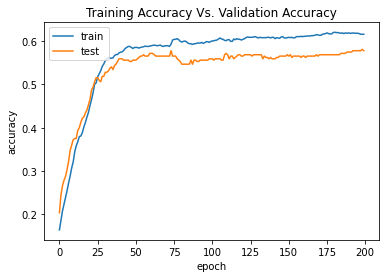

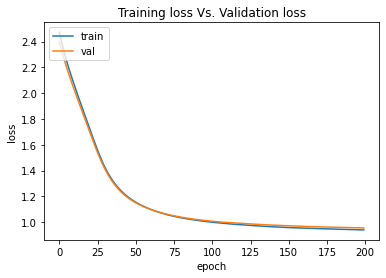

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy Vs. Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss Vs. Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Our Neural Network operates as expected, as shown in the graphs above, which means that our model did not overfit or underfit the training data, and we have nearly identical accuracy ratings for both the train and test sets. The training and test losses are also the same, implying that the model's loss would be similar for unknown data.

In [22]:
y_predict = nnModel.predict(X_test)
y_predict_num = np.argmax(y_predict, axis=1)

# Got this code from https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_predict_num)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_predict_num, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predict_num, average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.578125
Precision: 0.541824
Recall: 0.578125


The Neural Network model we have trained, has the scores of:
- Accuracy: 0.58
- Precision (weighted): 0.54
- Recall (weighted): 0.58

The scores of our regression models:
- Random Forest scores: 
  - R^2: 0.52
  - RMSE: 0.56
  - MAE: 0.42
- Gradient Boosting scores: 
  - R^2: 0.49
  - RMSE: 0.58
  - MAE: 0.45


The scores of our classification model (NN):
- Accuracy: 0.58
- Precision: 0.54
- Recall: 0.58


### Conclusion
We may deduce that the Neural Network model outperforms the other two regression models by comparing performance scores. The links between distinct aspects of the dataset are difficult to get since the 'wine quality' dataset comprises many features with moderate correlations between several of them, and regression methods are not good at finding complex associations. However, because Neural Network models are highly good at very difficult tasks, they can be quite beneficial in obtaining these correlations. However, Neural Network models require a big quantity of data, which we do not have, and as a result, the performance scores of our classification model were not as high as they could have been.
